<font color='red'>
<ol type='1'>
<li>Function that gets predictions from output 5/5</li>
<li>Create a plot to show 10 correctly identified digits and 10 incorrectly identified digits 5/5</li>
<li>Create a plot showing the 10 weight images 5/5</li>
<li>Replicate the output of the neural network given input, weights, and bias 5/5</li>
</ol>

Total: 20/20
</font>

In [1]:
## Homework 3
##
## simple MNIST classifier network
##
## NSC3270/5270 Spring 2019

import numpy as np
import matplotlib.pyplot as plt
from math import e

# supress some unnecessary warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

# load, display, and format mnist images and labels

In [2]:
from tensorflow.keras.datasets import mnist

# load mnist images --> LOAD THE DATA
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# check dimensions and type of images and labels

print('train')
print(train_images.shape)
print(train_labels.shape)
print(type(train_images))
print(type(train_labels))
print()

print('test')
print(test_images.shape)
print(test_labels.shape)
print(type(test_images))
print(type(test_labels))

train
(60000, 28, 28)
(60000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

test
(10000, 28, 28)
(10000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


There are 60,000 train images and 10,000 test images. Each image is 28x28 pixels (gray scale).

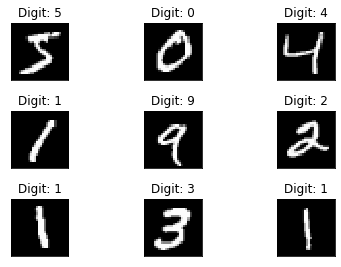

In [4]:
# display the first 9 digits

fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1) #---> PLACES AN IMAGE AT i + 1
    plt.tight_layout()
    plt.imshow(train_images[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(train_labels[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

### reformat training and testing images

In [5]:
# check out (again) dimensions and types of mnist data
print('Training images shape: ', train_images.shape)
print('Training pixel type:   ', type(train_images[0][0][0]))
print('Testing images shape:  ', test_images.shape)
print('Testing pixel type:    ', type(test_images[0][0][0]))

Training images shape:  (60000, 28, 28)
Training pixel type:    <class 'numpy.uint8'>
Testing images shape:   (10000, 28, 28)
Testing pixel type:     <class 'numpy.uint8'>


In [6]:
# number of images
Ntr = train_images.shape[0] #number of training items
Nts = test_images.shape[0]  #number of testing items

# image shape
szx = train_images.shape[1]
szy = train_images.shape[2]

# need to reshape the 28x28 training/testing images as vectors (28*28 = 784)
train_images_vec = train_images.reshape((Ntr, szx * szy)) #--> (60,000, 784); reshape will do it for you
test_images_vec = test_images.reshape(  (Nts, szx * szy)) #--> 

# deciding to normalize the pixels to 0..1 and recase as float32
train_images_vec = train_images_vec.astype('int') / 255  #turning into a floating point --> turn it into a new type
test_images_vec = test_images_vec.astype('int') / 255

# display new input dimensions/type
print('New training images shape: ', train_images_vec.shape)
print('New training pixel type:   ', type(train_images_vec[0][0]))
print('New testing images shape:  ', test_images_vec.shape)
print('New testing pixel type:    ', type(test_images_vec[0][0]))

New training images shape:  (60000, 784)
New training pixel type:    <class 'numpy.float64'>
New testing images shape:   (10000, 784)
New testing pixel type:     <class 'numpy.float64'>


### reformat training and testing labels

In [7]:
# check out dimensions and types of mnist data
print('Training labels shape: ', train_labels.shape) #just 60,000, test labels = 10,000
print('Training labels type:  ', type(train_labels[0]))
print()

# check out what the first 9 labels look like
print("First 9 training labels as labels:\n", train_labels[:9]) #one hot coding -->0 accepts the place where the right anwser is --> we want the network to learn

Training labels shape:  (60000,)
Training labels type:   <class 'numpy.uint8'>

First 9 training labels as labels:
 [5 0 4 1 9 2 1 3 1]


In [8]:
from tensorflow.keras.utils import to_categorical

# also need to categorically encode the labels as "one hot" --> what does this do?
# what does one_hot have to do --> assuming that there is one correct anwser; the number corresponds to the location
  #network = 10 of these; 784 of these
  #if it is 3 --> produce 10 items --> corresponds to 4th location

train_labels_onehot = to_categorical(train_labels) #basically for every classification problem; transferring categories into neural networks
test_labels_onehot = to_categorical(test_labels) #what is occuring here

print("First 9 training labels as one-hot encoded vectors:\n", train_labels_onehot[:9]) #the 1 corresponds to the number '5' then '6'

First 9 training labels as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [9]:
# display new output dimensions/type
print('New training labels shape (one hot): ', train_labels_onehot.shape)
print('New training labels type (one hot):  ', type(train_labels_onehot[0][0]))

New training labels shape (one hot):  (60000, 10)
New training labels type (one hot):   <class 'numpy.float32'>


# define and train neural network

In [10]:
# import tools for basic keras networks --> ALOT OF DATA TO FORM --> has already been done
from tensorflow.keras import models
from tensorflow.keras import layers

nout = 10

# create architecture of simple neural network model
# input layer  : 28*28 = 784 input nodes
# output layer : 10 (nout) output nodes
network = models.Sequential() #sequential layers --> how many layers are on this model?; #this is a holder
network.add(layers.Dense(nout, #add the layers to the network --> one that has this dense connection; #specifiy units --> number of digits
                         activation='sigmoid', #tell what is the activation function; very flexible
                         input_shape=(szx * szy,))) #THIS IS OPTIONAL! --> the number is 784 (x dimension times y dimension)

# print a model summary #keras only one layer coming from the layer before it; layer is something that is trying to come into it
print(network.summary())
print()
for layer in network.layers:
    print('layer name : {} | input shape : {} | output shape : {}'.format(layer.name, layer.input.shape, layer.output.shape))
print()
for layer in network.layers:
    print(layer.get_config())
print()

#number of parameters, 784 inputs going to 10 outputs, plus the bias --> (784*10) + 10; this is what is being learned
#can adjust weights, biases, etc.
#do some stuff by hand --> availability of APIs to create really complicated networks

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None

layer name : dense | input shape : (None, 784) | output shape : (None, 10)

{'name': 'dense', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 10, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}



In [11]:
# compile network --> telling the network how it is going to learn and how it is going to be evaluated
network.compile(optimizer='sgd', #algorith adjusting weights and biases
                loss='mean_squared_error', #what do you measure in terms of the error --> how do you measure that error; the value is not meaningful but it is decreasing 
                #what the network is producing versus what the teacher is telling us to produce
                metrics=['accuracy']) #the network hasn't been trained in anything yet
#loss going down, accuracy goes up
#784 inputs and then 10 outputs
#difference between that squared
#all the weights and biases have been changed
#error = sigma (0-teacher)^2 --> we are using this to change the weights and understand the biases
#optimization PROBLEM --> can't just throw calculus at this

# now train the network
history = network.fit(train_images_vec, #fitting the network to the date; training the network
                      train_labels_onehot, #60,000 by 10 array 
                      verbose=True, 
                      validation_split=.1, 
                      epochs=20, #how many times you are going to cycle through the 60,000
                      batch_size=128) #updates the weights, why do you need to update the weights
print('Done training!')
print()

Epoch 1/20
422/422 [==============================] - 1s 1ms/step - loss: 0.1446 - accuracy: 0.1182 - val_loss: 0.1059 - val_accuracy: 0.1867
Epoch 2/20
422/422 [==============================] - 0s 1ms/step - loss: 0.0987 - accuracy: 0.2311 - val_loss: 0.0925 - val_accuracy: 0.3190
Epoch 3/20
422/422 [==============================] - 0s 922us/step - loss: 0.0907 - accuracy: 0.3664 - val_loss: 0.0872 - val_accuracy: 0.4522
Epoch 4/20
422/422 [==============================] - 0s 884us/step - loss: 0.0865 - accuracy: 0.4652 - val_loss: 0.0836 - val_accuracy: 0.5210
Epoch 5/20
422/422 [==============================] - 0s 891us/step - loss: 0.0833 - accuracy: 0.5148 - val_loss: 0.0805 - val_accuracy: 0.5583
Epoch 6/20
422/422 [==============================] - 0s 847us/step - loss: 0.0804 - accuracy: 0.5439 - val_loss: 0.0776 - val_accuracy: 0.5808
Epoch 7/20
422/422 [==============================] - 0s 860us/step - loss: 0.0777 - accuracy: 0.5637 - val_loss: 0.0748 - val_accuracy: 0.5

In [12]:
# test network
test_loss, test_acc = network.evaluate(test_images_vec, #statistical reasons for doing that (KAGGLE competitions --> the power of neural networks)
                                       test_labels_onehot, 
                                       verbose=True)
print('test_acc:', test_acc)

313/313 [==============================] - 0s 494us/step - loss: 0.0548 - accuracy: 0.7218
test_acc: 0.7218000292778015


# some pieces needed to complete Homework 3

In [13]:
# get learned network weights and biases --> layer 0 (get the weigthts and the biases)

W = network.layers[0].get_weights()[0]     # weights input to hidden
B = network.layers[0].get_weights()[1]     # bias to hidden

print('W {} | B {}'.format(W.shape, B.shape)) #just a unit dimension vector with 10 elements

W (784, 10) | B (10,)


In [14]:
# model predictions (all 10000 test images)
out = network.predict(test_images_vec) #it gives output activity + PERFORMANCE
#^^^take teh outputs (10,000 by 10 numpy array)
#^^take the max of the 'out'
#anwser that is produed by the network --> ASSUME WINNER TAKES ALL
#pulling out the index of the max
#find 10 examples (1 for each digit) 
#first anwser is the ocrrect anwer, to the right is the errors
#create images from the weights --> going from a 784 element array to a 28*28 arrayS

# model predictions (a single test image)
example = test_images_vec[123] #pulls out the other pieces of this assignment
print(example.shape)

# vector passed to network.predict must be (?, 784)
example = example.reshape((example.shape[0],1))
print(example.shape)

(784,)
(784, 1)


In [15]:
## Homework 3 Solution Area

## Q1. The original MNIST test_labels numpy array contains the digit value associated
## with the corresponding digit image (test_images). The output from the network (from
## out = network.predict(test_images_vec) above) contains the activations of the 10
## output nodes for every test image presented to the network. Write a function that
## takes the (10000,10) numpy array of output (of type float) activations and returns a 
## (10000,) numpy array of discrete digit classification by the network (of type int).
## Specifically, create a test_decisions numpy array of the same size and type as the
## MNIST test_labels array you started with. Whereas test_labels shows the correct
## answer, test_decisions shows the ultimate decision by the network. Below you will use 
## both arrays to pull out test images that the network classifies correctly vs. incorrectly.
##
## To turn a numpy array of continuous output activations into a discrete digit classification,
## just take the maximum output as the "winner" that "takes all", determining the classification.
##
## In your function, feel free to use for loops. Here, we are looking to see that you understand
## how to use the outputs generated by the network, not whether you can program using the
## most efficient Python style.

test_decisions_list = [] #set up test_decisions list
for each_row in out: #each row in your output
    test_decision = np.where(each_row == np.max(each_row)) #calculates the index in the row where the maximum of the row is
    test_decision = int(test_decision[0]) #convert the one element tuple to an integer
    test_decisions_list.append(test_decision) #append the index of the max to a list
test_decisions = np.asarray(test_decisions_list, dtype = int) #convert the list to an array

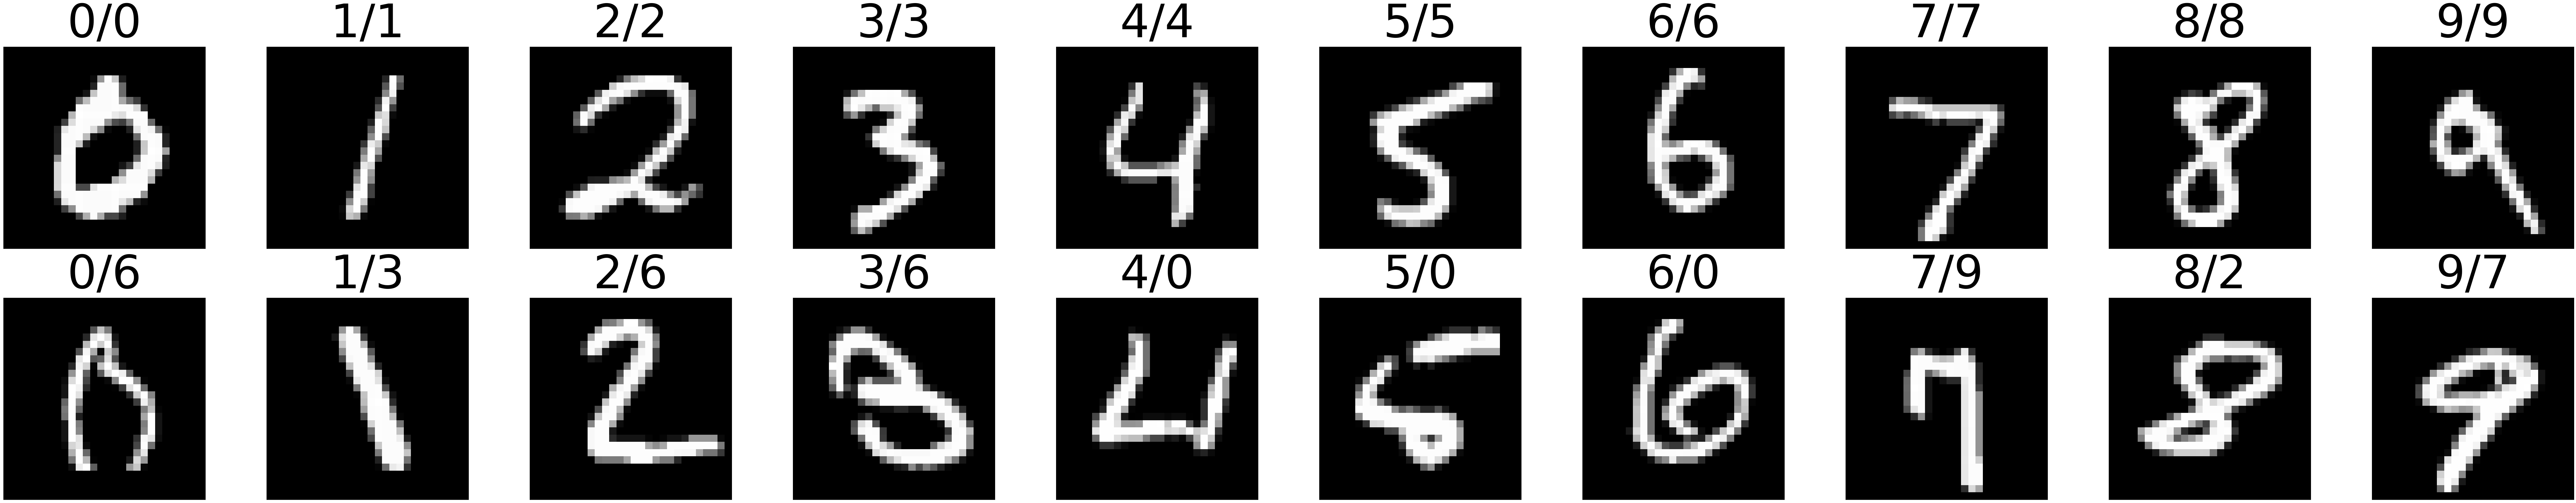

In [16]:
## Q2. Comparing the correct answers (test_labels) and network classifications (test_decisions),
## for each digit 0..9, find one test image (test_image) that is classified by the network
## correctly and one test image that is classified by the network incorrectly. 
##
## Create a 2x10 plot of digit images (feel free to adapt the code above that uses subplot), with a 
## column for each digit 0..9 with the first row showing examples correctly classified (one example 
## for each digit) and the second row showing the examples incorrectly classified (one example 
## for each digit). Each subplot title should show the answer and the classification response 
## (e.g., displaying 4/2 as the title, if the correct answer is 4 and the classification was 2).

#establishing a function that takes in the parameters --> new_images, iteration amount, the decision made by the network, and the fontsize 
def plot_images (new_images, iteration, new_decision, fontsize):
    plt.tight_layout() #tightens the layout
    plt.xticks([])
    plt.yticks([])
    plt.imshow(new_images, cmap='gray', interpolation='none')
    plt.title("{}/{}".format(iteration, new_decision), fontdict = {'fontsize': fontsize})
    
fig = plt.figure(figsize = (120,23))

z = 10

for i in range(z):
    plt.subplot(2,10, i+1)
    bool_array = (test_decisions == test_labels) & (test_labels == i) #creates a boolearn array in which all the values are of i
    new_images = test_images[bool_array][0,:,:] #this array only contains the correct numbers between both test_decisions and test_labels at the 0th column
    new_decision = test_decisions[bool_array][0] #this array only contains the digit of the correct numbers at the 0th column
    plot_images(new_images, i, i, 150) #calls the function

for y in range(z):
    plt.subplot(2,10, y+11) 
    bool_array = (test_decisions != test_labels) & (test_labels == y)  #creates a boolearn array in which all the values that the network incorrectly classified for i
    new_images = test_images[bool_array][0,:,:] #slices at the 0th column
    new_decision = test_decisions[bool_array][0] #only contains the digit of network at the 0th column
    plot_images(new_images, y, new_decision, 150) #calls the function

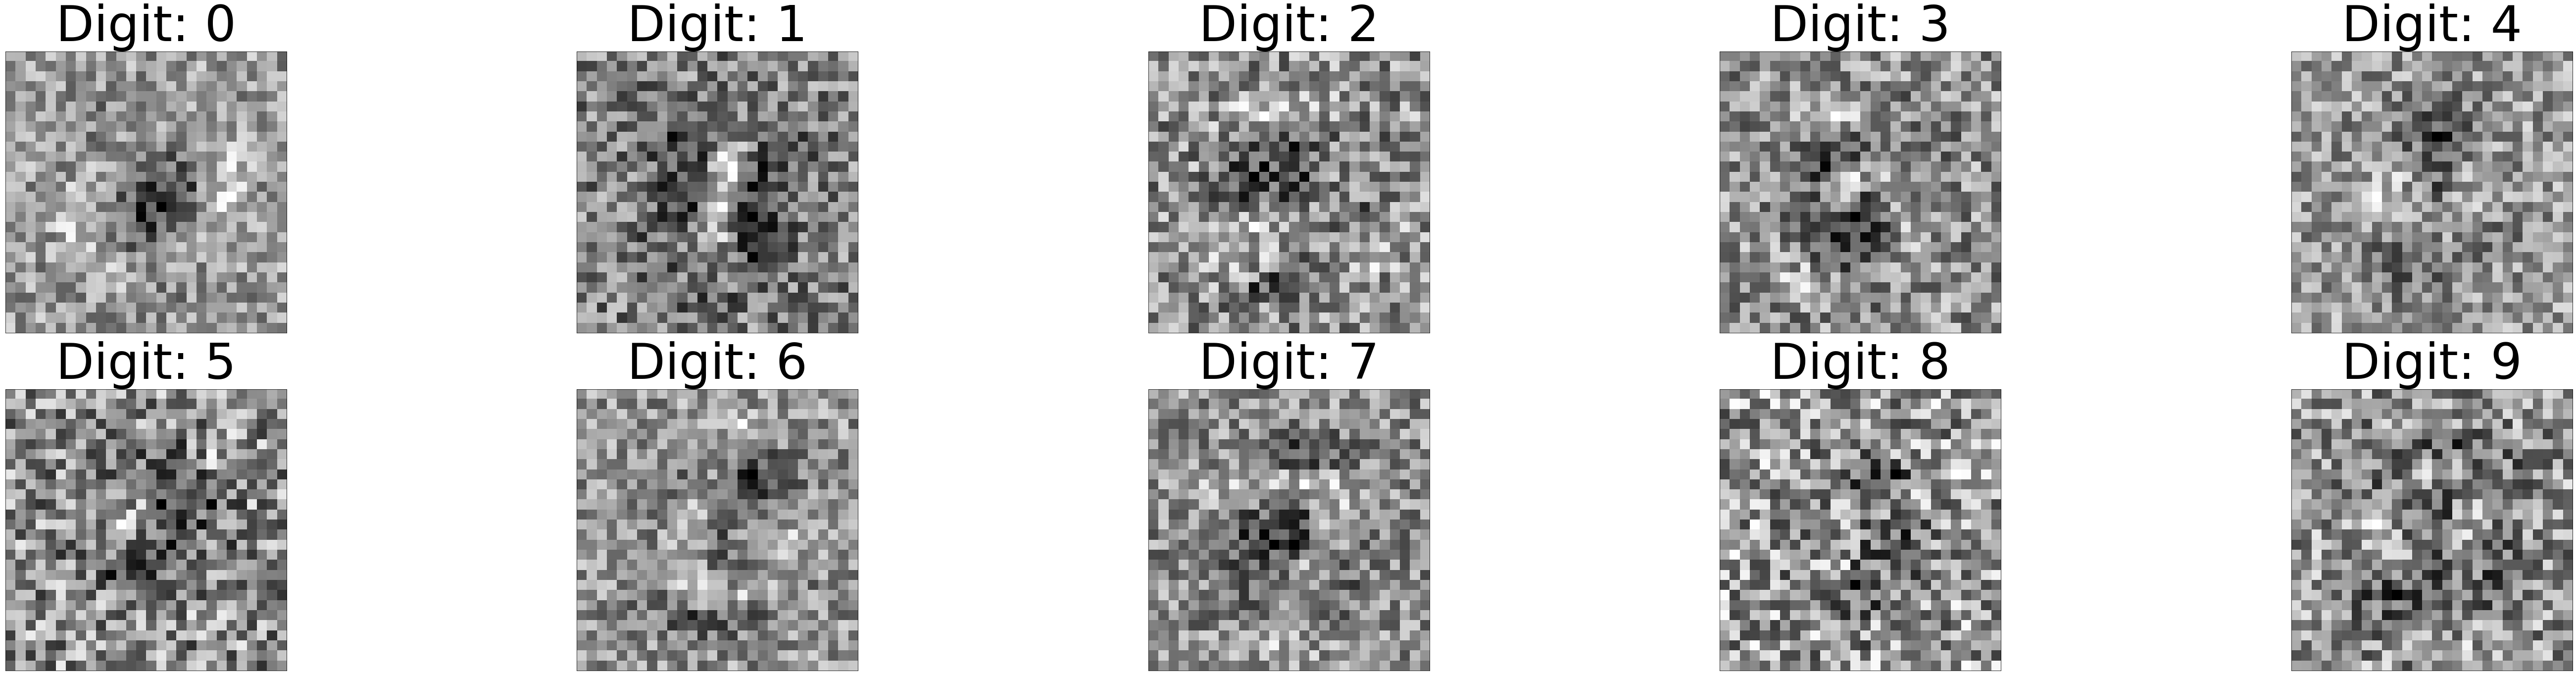

In [17]:
## Q3. Create "images" of the connection weight adapting the code used to display
## the actual digit images. There should be 10 weight images, an image for each
## set of weight connecting the input layer (784 inputs) to each output node.
## You will want to reshape the (784,1) vector of weights to a (28,28) image and
## display the result using imshow()

fig = plt.figure(figsize = (100,23)) #create figure
for column in range (W.shape[1]):
    plt.subplot(2,5, column+1) #creates a subplot of 2 by 5
    new_W = W[:,column] #indexes all the values based on the first column
    image_size = new_W.reshape(28,28) #reshapes it to a 28 by 28 array
    plt.imshow(image_size, cmap='gray', interpolation='none') #shows the plots
    plt.title("Digit: {}".format(column), fontdict = {'fontsize': 100})
    plt.xticks([]) #doesnt show the x marks
    plt.yticks([]) #doesnt show the y marks

In [18]:
## Q4. Use the weight matrix (W), bias vector (B), and activation function (simple sigmoid)
## to reproduce in your own code the outputs (out) generated by the network (from
## this out = network.predict(test_images_vec))
##
## The simple sigmoid activation function is defined as follows:
## f(x) = 1 / (1+exp(-x))
##
## Confirm that your output vectors and the keras-produced output vectors are the same
## (within some small epsilon since floating point calculations will often not come out
## exactly the same on computers).

#take the dot product of the linear sequence of test images and the weights, and then add the bias value
C = np.dot(test_images_vec,W) + B

#a function that includes the calculations needed to get the y value of a sigmoidal function
def vect_logistic_function (x):
    vect_logistic_output = 1/(1+(e**(-x)))
    return vect_logistic_output

#looks at the outputs from the vect_logistic_function and compares it against the output values of the neural network to determine accuracy
if np.all((vect_logistic_function(C) - out < 0.00001)):
    print("The output vectors and the keras-produced output vectors are the same!")

The output vectors and the keras-produced output vectors are the same!
